In [43]:
%pylab inline
import numpy as np
import math
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
import re

colors = ['#1f78b4', 
          '#a6cee3', 
          '#33a02c', 
          '#b2df8a', 
          '#e31a1c', 
          '#fb9a99', 
          '#ff7f00',
          '#fdbf6f'] 

# Set plot aspect ratio to 'the golden ratio.'
fig_width     = 6.5
golden_ratio  = (np.sqrt(5)-1.0)/2.0
fig_height    = fig_width*golden_ratio
fig_size      =  [fig_width,fig_height]
fig_font_size = 10

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

params        = { 'axes.labelsize' : 10,
                  'axes.titlesize' : 10,
                  'backend'        : 'ps',
                  'font.family'    : 'serif',
                  'font.size'      : fig_font_size,
                  'legend.fontsize': fig_font_size,
                  'figure.dpi'     : 150,
                  'figure.figsize' : fig_size,
                  'savefig.dpi'    : 600,
                  'savefig.bbox'   : 'tight',
                  'text.usetex'    : True,
                  'xtick.labelsize': fig_font_size,
                  'ytick.labelsize': fig_font_size,
}

pylab.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# Initialize velocity space.
x1 = np.linspace(0,5)
y1 = np.power(x1,1)
u1 = np.multiply(np.ones(50),1)
x2 = np.linspace(0,5)
y2 = np.power(x2,2)
u2 = np.multiply(np.ones(50),1)
x3 = np.linspace(0,5)
y3 = np.power(x3,3)
u3 = np.multiply(np.ones(50),1)

In [134]:
def convert_to_sci_LaTeX(inarr, p=1):
    x = list(inarr)
    for n,i in enumerate(x):
        if(i != 0):
            x[n] = "${:.{p}e}".format(x[n],p=p)
            x[n] = re.sub(r'e', r'\\times10^{', x[n])
            x[n] = re.sub(r'$', r'}$', x[n])
            x[n] = re.sub(r'{\+[0]*', '{', x[n])
            x[n] = re.sub(r'{\-[0]*', '{', x[n])
            x[n] = re.sub(r'{}', '{0}', x[n])
        else:
            x[n] = "0"
            
    return(x)

print(convert_to_sci_LaTeX([15.e+19],1))

['$1.5\\times10^{20}$']


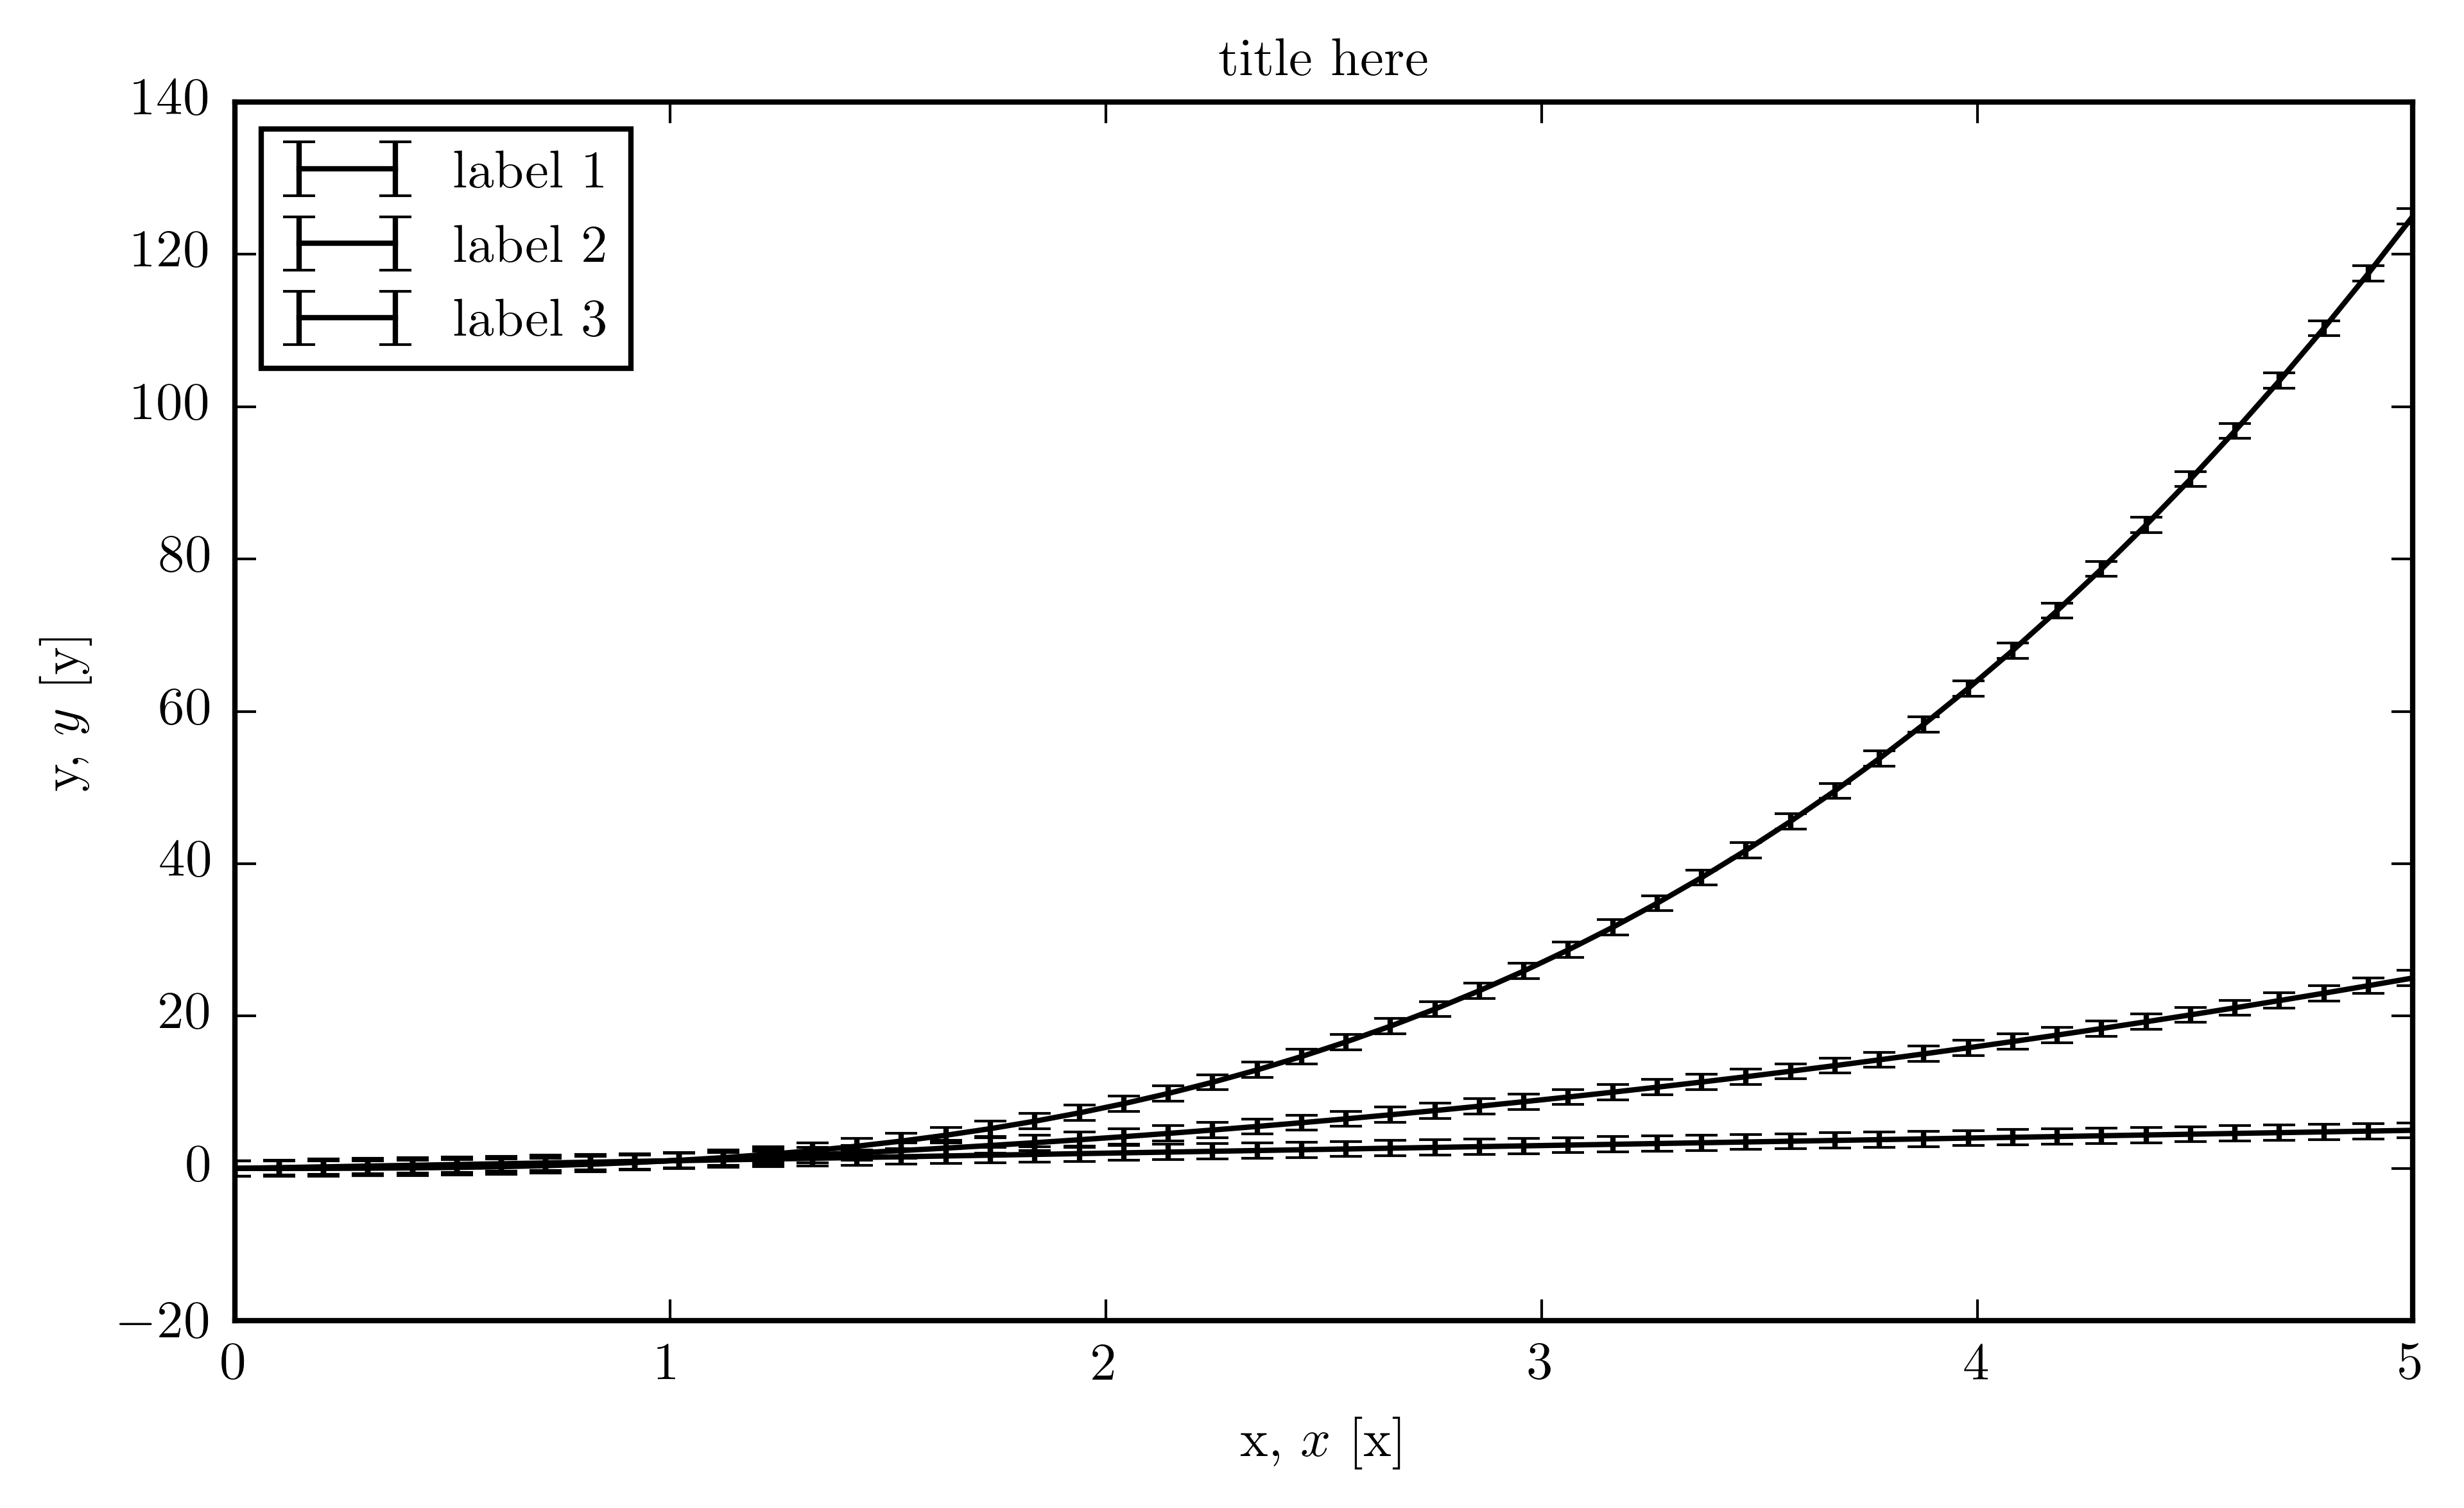

In [153]:
# Line plotting function for a single or multiple series.
#
# x = array of independent values to plot, 
#     or array of array of independent values to plot
#
# y = array of   dependent values to plot, 
#     or array of array of   dependent values to plot
#
# u = array of             uncertainty values to plot,
#     or array of array of uncertainty values to plot
#

def line_plot(outfilename='',
              
              x = [],
              y = [],
              u = [],
              l = ['label 1'],
              s = [],
              m = [],
              w = [],
              
              plot_title = '',
              plot_xlabel1 = 'x, $x$ [x]',
              plot_ylabel1 = 'y, $y$ [y]',
              plot_legend = True,
              plot_legend_loc = 'best',
              
              plot_ylog = False,
              plot_xlog = False,
              plot_ysci = False,
              plot_ysci_places = 1,
              plot_xsci = False,
              plot_xsci_places = 1,
              
              plot_y2sci = False,
              plot_y2sci_places = 1,
              plot_x2sci = False,
              plot_x2sci_places = 1,
              
              plot_color = False,
              plot_colors = colors,
              
              plot_x2transform = False,
              plot_x2transformfn = None,
              plot_x2label = '',
              plot_y2transform = False,
              plot_y2transformfn = None,
              plot_y2label = ''
    ):

    # Series-wise default properties.
    if(s == []):
        for i in range(len(x)):
            s.append('-')
    if(m == []):
        for i in range(len(x)):
            m.append('')
    if(w == []):
        for i in range(len(x)):
            w.append(1.0)
    
    # Create figure and primary axes.
    plt.figure()
    ax1 = plt.gca()
    
    # Create actual plots.
    for n,i in enumerate(x):
        if(plot_color):
            color = plot_colors[n]
        else:
            color = '#000000'
        if(u == [] or u[0] == ''):
            plt.plot(x[n],
                     y[n], 
                     color=color, 
                     marker=m[n],
                     linestyle=s[n],
                     linewidth=w[n],
                     label=l[n])
        else:
            plt.errorbar(x[n],
                         y[n], 
                         u[n],
                         color=color, 
                         marker=m[n],
                         linestyle=s[n],
                         linewidth=w[n],
                         label=l[n])
        
    # Set plot properties.
    if(plot_x2transform and plot_x2label != ''):
        plt.title(plot_title, y=1.13)
    elif(plot_x2transform or plot_x2label != ''):
        plt.title(plot_title, y=1.08)
    else:
        plt.title(plot_title)
    ax1.set_xlabel(plot_xlabel1)
    ax1.set_ylabel(plot_ylabel1)
    
    # Set plot scaling.
    if(plot_ylog):
        ax.set_yscale("log", nonposy='clip')
    if(plot_xlog):
        ax.set_xscale("log", nonposx='clip')

    # Setup legend.
    if(plot_legend):
        leg = plt.legend(loc=plot_legend_loc, handlelength=2.4)
        
    # Setup ticks.
    xticks1 = ax1.xaxis.get_majorticklocs()
    yticks1 = ax1.yaxis.get_majorticklocs()

    xmin2, xmax2 = np.min(xticks1), np.max(xticks1)
    ymin2, ymax2 = np.min(yticks1), np.max(yticks1)

    if(plot_x2transform):
        ax2 = ax1.twiny()
        ax2.set_xlabel(plot_x2label)
        axis([xmin2, xmax2, ymin2, ymax2])

        xticks2 = ax2.xaxis.get_majorticklocs()

        ax2.set_xticks(xticks2)
        ax2.set_xticklabels(plot_x2transformfn(xticks2))
        
    if(plot_y2transform):
        ax3 = ax1.twinx()
        ax3.set_ylabel(plot_y2label)
        axis([xmin2, xmax2, ymin2, ymax2])

        yticks2 = ax3.yaxis.get_majorticklocs()

        ax3.set_yticks(yticks2)
        ax3.set_yticklabels(plot_y2transformfn(yticks2))
          
    if(plot_ysci):
        ax1.set_yticklabels(convert_to_sci_LaTeX(tuple(yticks1),p=plot_ysci_places))
    if(plot_y2sci):
        ax3.set_yticklabels(convert_to_sci_LaTeX(tuple(plot_y2transformfn(yticks2)),p=plot_ysci_places))

    if(plot_xsci):
        ax1.set_xticklabels(convert_to_sci_LaTeX(tuple(xticks1),p=plot_xsci_places))
    if(plot_x2sci):
        ax2.set_xticklabels(convert_to_sci_LaTeX(tuple(plot_x2transformfn(xticks2)),p=plot_xsci_places))
    
    # Remove extraneous margins.
    plt.tight_layout()
    
    # Export, or show.
    if(outfilename ==''):
        plt.show()
    else:
        plt.savefig(outfilename, transparent=False)
    
    return

###################################################################################

def x2xform(x):
    return([z for z in x * 1/1.60217662E-19])

line_plot(x = [x1, x2, x3], 
          y = [y1, y2, y3],
          u = [u1, u2, u3],
          l = ['label 1', 'label 2', 'label 3'],
          plot_title = 'title here',
          plot_xlabel1 = 'x, $x$ [x]',
          plot_ylabel1 = 'y, $y$ [y]'
         )